## Transactions Dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Load the transactions dataset
trans = pd.read_csv("TRANSACTION_TAKEHOME.csv")
trans.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [3]:
# Check the data shape and info
print('transactions data shape: ', trans.shape)
print(trans.info())

transactions data shape:  (50000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB
None


In [4]:
# Data types transforming: BARCODE columns
trans["BARCODE"] = trans["BARCODE"].astype(str)

# Clean the BARCODE column's format
trans["BARCODE"] = trans["BARCODE"].str.replace(".0", "")
trans["BARCODE"] = trans["BARCODE"].replace("nan", np.nan)

In [5]:
# Data types transforming: FINAL_QUANTITY, FINAL_SALE columns
trans['FINAL_QUANTITY'] = trans['FINAL_QUANTITY'].replace("zero", 0)
trans["FINAL_QUANTITY"] = trans["FINAL_QUANTITY"].astype(float)

trans['FINAL_SALE'] = trans['FINAL_SALE'].replace(" ", np.nan)
trans["FINAL_SALE"] = trans["FINAL_SALE"].astype(float)

In [6]:
# Data types transforming: PURCHASE_DATE, SCAN_DATE columns
trans["PURCHASE_DATE"] = pd.to_datetime(trans["PURCHASE_DATE"])
trans["SCAN_DATE"] = pd.to_datetime(trans["SCAN_DATE"]).dt.tz_convert(None)

In [7]:
print(trans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      50000 non-null  object        
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]
 2   SCAN_DATE       50000 non-null  datetime64[ns]
 3   STORE_NAME      50000 non-null  object        
 4   USER_ID         50000 non-null  object        
 5   BARCODE         44238 non-null  object        
 6   FINAL_QUANTITY  50000 non-null  float64       
 7   FINAL_SALE      37500 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 3.1+ MB
None


In [8]:
# Check duplicates
print("duplicates counts: ", trans.duplicated().sum())
trans[trans.duplicated(keep=False)].sort_values(by="RECEIPT_ID")

duplicates counts:  171


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
40498,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,79200060688,1.0,1.25
45553,007d3232-3990-497f-a081-549e9e7a478b,2024-06-25,2024-06-27 21:21:53.442,DOLLAR TREE STORES INC,63a8dbf101cb7c888c6ad87d,79200060688,1.0,1.25
49759,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835,WALMART,614e733372ba844aa8dc345e,41789001215,1.0,0.52
49758,01a70fe0-026f-4bea-9da4-7d13bbf21e9a,2024-09-02,2024-09-07 16:02:39.835,WALMART,614e733372ba844aa8dc345e,41789001215,1.0,0.52
32463,0273cbd8-1620-46c9-8e99-6971e850a2fc,2024-09-08,2024-09-08 22:17:11.989,WALMART,60e4f3ac34f82e1344669ee2,681131148320,1.0,3.48
...,...,...,...,...,...,...,...,...
48463,f871a430-7fcb-4d95-989e-aa0b57497eca,2024-09-01,2024-09-07 17:45:11.519,KROGER,615c505eb220b85b9615f063,NaN,1.0,1.00
41604,fa8ab2d7-b051-47d7-bd56-d0d88997d367,2024-07-22,2024-07-31 21:26:56.929,ALDI,653c241b909604bae9074b22,NaN,1.0,0.47
41593,fa8ab2d7-b051-47d7-bd56-d0d88997d367,2024-07-22,2024-07-31 21:26:56.929,ALDI,653c241b909604bae9074b22,NaN,1.0,0.47
46640,fb825ba4-fe3b-45b4-a547-5a33d23e5e33,2024-08-24,2024-08-25 13:58:08.848,WALMART,61ed4fda0605d0323d86dced,78742229492,1.0,0.78


In [9]:
# Check the missing data and % population of each column
trans_stats = pd.DataFrame(trans.count(), columns=['count'])
trans_stats['missing'] = trans.isnull().sum()
trans_stats['% pop'] = 1 - trans_stats['missing'] / trans.shape[0]
trans_stats

,count,missing,% pop
RECEIPT_ID,50000,0,1.00000
PURCHASE_DATE,50000,0,1.00000
SCAN_DATE,50000,0,1.00000
STORE_NAME,50000,0,1.00000
USER_ID,50000,0,1.00000
BARCODE,44238,5762,0.88476
FINAL_QUANTITY,50000,0,1.00000
FINAL_SALE,37500,12500,0.75000


The Transactions dataframe contains 320 duplicated rows. It needs further clarification on the data collection process to determine whether these duplicates are due to errors or if they are valid entries (i.e., the same product can be shown multiple times in the same receipt).

Additionally, there are missing values in the following columns:

- `BARCODE`: 11.5% missing values
- `FINAL_SALE`: 25% missing values

These two columns are particularly important, as `BARCODE` serves as the product identifier and will be used for data merging, while `FINAL_SALE` shows the value of the transaction.

In [11]:
# Separate the columns into numeric and categorical
numeric = ["PURCHASE_DATE", "SCAN_DATE", "FINAL_QUANTITY", "FINAL_SALE"]
categorical = ["RECEIPT_ID", "STORE_NAME", "USER_ID", "BARCODE"]

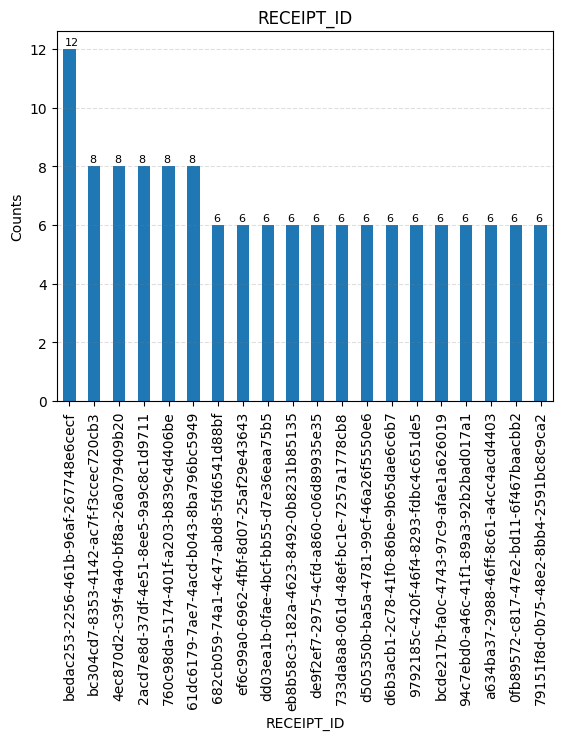

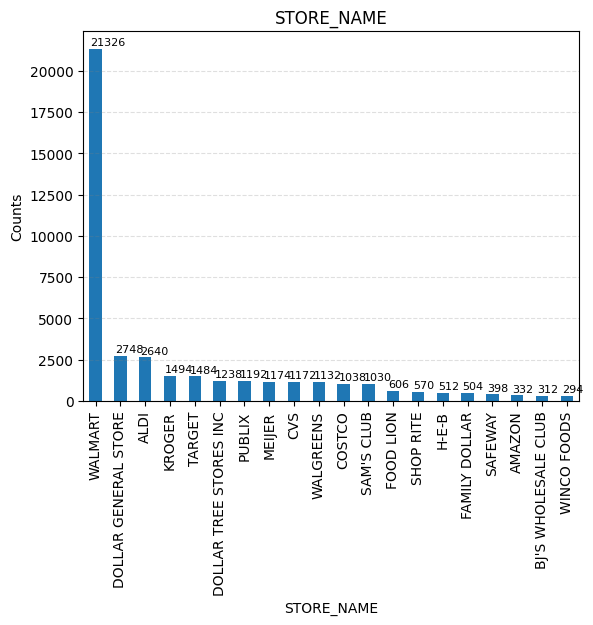

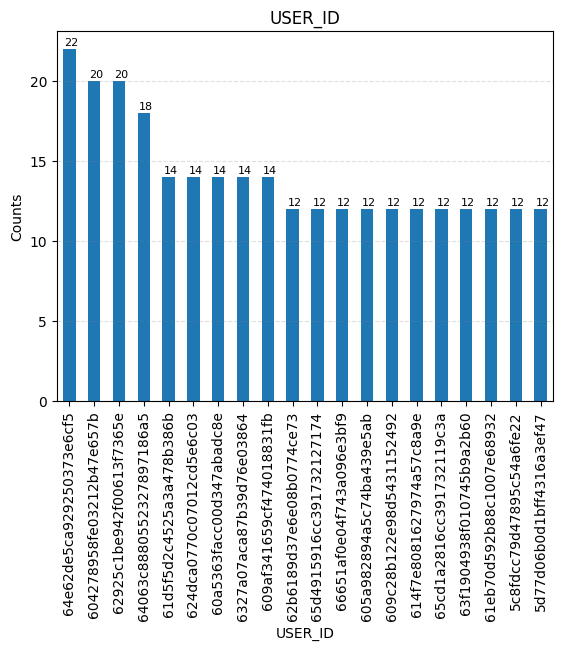

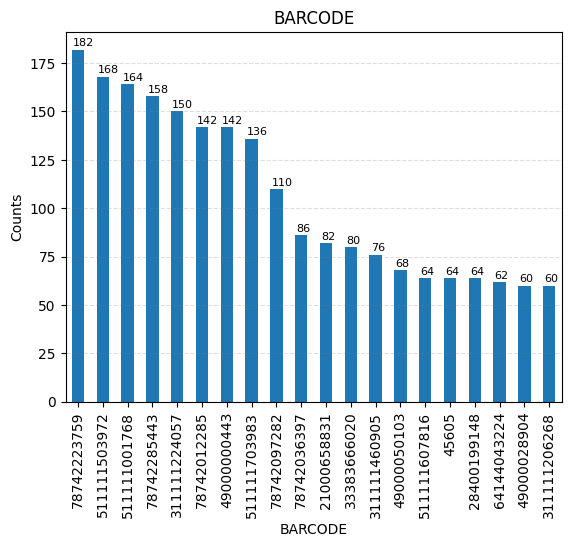

In [12]:
# plot categorical histograms
for col in categorical:
    counts = trans[col].value_counts().head(20)
    ax = counts.plot(kind='bar')
    for i, v in enumerate(counts):
        ax.text(i - 0.2, v + counts.max()*0.01, str(v), color='black', fontsize=8)

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Counts')
    ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
    plt.show()

Duplicated `RECEIPT_ID` and `USER_ID` require further investigation to understand the cause and determine the appropriate action.

### `RECEIPT_ID` column

In [13]:
# Check the RECEIPT_ID column distribution
print(trans["RECEIPT_ID"].describe())
trans["RECEIPT_ID"].value_counts(dropna=False)

count                                    50000
unique                                   24440
top       bedac253-2256-461b-96af-267748e6cecf
freq                                        12
Name: RECEIPT_ID, dtype: object


RECEIPT_ID
bedac253-2256-461b-96af-267748e6cecf    12
bc304cd7-8353-4142-ac7f-f3ccec720cb3     8
4ec870d2-c39f-4a40-bf8a-26a079409b20     8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711     8
760c98da-5174-401f-a203-b839c4d406be     8
                                        ..
56a368e6-d677-459d-ba05-70a886c3126b     2
56a0e14c-187c-43ec-96ab-b67ac5c197f1     2
569f4be9-63d1-4afd-8ed5-d520ce85b878     2
56946262-15b1-41fd-8814-fc544d35fc6c     2
fffe8012-7dcf-4d84-b6c6-feaacab5074a     2
Name: count, Length: 24440, dtype: int64

In [14]:
# Look into the most common receipt_id
trans[trans["RECEIPT_ID"] == "bedac253-2256-461b-96af-267748e6cecf"]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
18637,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348,KROGER,614f7e8081627974a57c8a9e,11110121141,0.0,0.89
18638,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348,KROGER,614f7e8081627974a57c8a9e,11110121141,1.0,NaN
18639,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348,KROGER,614f7e8081627974a57c8a9e,11110121141,0.0,0.89
18640,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348,KROGER,614f7e8081627974a57c8a9e,11110121141,1.0,NaN
18641,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348,KROGER,614f7e8081627974a57c8a9e,11110121141,0.0,0.89
18642,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348,KROGER,614f7e8081627974a57c8a9e,11110121141,1.0,NaN
39703,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348,KROGER,614f7e8081627974a57c8a9e,11110121141,1.0,0.89
39704,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348,KROGER,614f7e8081627974a57c8a9e,11110121141,1.0,0.89
39705,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348,KROGER,614f7e8081627974a57c8a9e,11110121141,1.0,0.89
39706,bedac253-2256-461b-96af-267748e6cecf,2024-09-08,2024-09-08 20:00:42.348,KROGER,614f7e8081627974a57c8a9e,11110121141,1.0,0.89


In [15]:
check = trans.groupby(["RECEIPT_ID", "BARCODE"])[["FINAL_QUANTITY", "FINAL_SALE"]].agg(["count", "nunique"])
check

FINAL_QUANTITY          \
                                                           count nunique   
RECEIPT_ID                           BARCODE                               
0000d256-4041-4a3e-adc4-5623fb6e0c99 15300014978               2       1   
00017e0a-7851-42fb-bfab-0baa96e23586 78742229751               2       1   
000239aa-3478-453d-801e-66a82e39c8af 783399746536              2       2   
00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1 47900501183               2       1   
0002d8cd-1701-4cdd-a524-b70402e2dbc0 681131411295              2       2   
...                                                          ...     ...   
fff60bb7-bf93-4e6b-8055-4d7688da7ead 78742213224               2       2   
fff6c6c8-e002-4262-85ea-25849d9721db 78742369822               2       1   
fffbb112-3cc5-47c2-b014-08db2f87e0c7 818000020115              2       2   
fffbfb2a-7c1f-41c9-a5da-628fa7fcc746 13000009546               2       1   
fffe8012-7dcf-4d84-b6c6-feaacab5074a 74323095777               2       2   

                                                  FINAL_SALE          
                                                       count nunique  
RECEIPT_ID                           BARCODE                          
0000d256-4041-4a3e-adc4-5623fb6e0c99 15300014978           1       1  
00017e0a-7851-42fb-bfab-0baa96e23586 78742229751           1       1  
000239aa-3478-453d-801e-66a82e39c8af 783399746536          2       1  
00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1 47900501183           1       1  
0002d8cd-1701-4cdd-a524-b70402e2dbc0 681131411295          2       1  
...                                                      ...     ...  
fff60bb7-bf93-4e6b-8055-4d7688da7ead 78742213224           2       1  
fff6c6c8-e002-4262-85ea-25849d9721db 78742369822           1       1  
fffbb112-3cc5-47c2-b014-08db2f87e0c7 818000020115          2       1  
fffbfb2a-7c1f-41c9-a5da-628fa7fcc746 13000009546           1       1  
fffe8012-7dcf-4d84-b6c6-feaacab5074a 74323095777           2       1  

[21979 rows x 4 columns]

In [16]:
check[(check[("FINAL_QUANTITY", "nunique")] > 1) | (check[("FINAL_SALE", "nunique")] > 1)]

FINAL_QUANTITY          \
                                                           count nunique   
RECEIPT_ID                           BARCODE                               
000239aa-3478-453d-801e-66a82e39c8af 783399746536              2       2   
0002d8cd-1701-4cdd-a524-b70402e2dbc0 681131411295              2       2   
00096c49-8b04-42f9-88ce-941c5e06c4a7 78300069942               2       2   
0019ec79-cbb3-41ed-b84c-cd74d04553f8 51500247051               2       2   
001f2f3f-1746-4217-a98f-73c63c63bae2 46000288697               2       2   
...                                                          ...     ...   
ffebda11-ff18-46e0-8455-cef0679558cc 79400591463               2       2   
ffef10cb-52ac-4123-aa87-0d65e85b6ef7 79400445445               2       2   
fff60bb7-bf93-4e6b-8055-4d7688da7ead 78742213224               2       2   
fffbb112-3cc5-47c2-b014-08db2f87e0c7 818000020115              2       2   
fffe8012-7dcf-4d84-b6c6-feaacab5074a 74323095777               2       2   

                                                  FINAL_SALE          
                                                       count nunique  
RECEIPT_ID                           BARCODE                          
000239aa-3478-453d-801e-66a82e39c8af 783399746536          2       1  
0002d8cd-1701-4cdd-a524-b70402e2dbc0 681131411295          2       1  
00096c49-8b04-42f9-88ce-941c5e06c4a7 78300069942           2       1  
0019ec79-cbb3-41ed-b84c-cd74d04553f8 51500247051           2       1  
001f2f3f-1746-4217-a98f-73c63c63bae2 46000288697           2       1  
...                                                      ...     ...  
ffebda11-ff18-46e0-8455-cef0679558cc 79400591463           2       1  
ffef10cb-52ac-4123-aa87-0d65e85b6ef7 79400445445           2       1  
fff60bb7-bf93-4e6b-8055-4d7688da7ead 78742213224           2       1  
fffbb112-3cc5-47c2-b014-08db2f87e0c7 818000020115          2       1  
fffe8012-7dcf-4d84-b6c6-feaacab5074a 74323095777           2       1  

[11066 rows x 4 columns]

In [17]:
# Check the situation that the same RECEIPT_ID has different BARCODE
barcode_count = trans.groupby("RECEIPT_ID")["BARCODE"].nunique()
barcode_count[barcode_count > 1]

RECEIPT_ID
019520fd-f28b-42ff-a29e-d6bf4f5c4b7c    2
01d0e64c-0b62-405f-a7bf-2dc04c36a53d    2
0373c1d8-3cc9-4cb2-a4f9-ddc7a974b671    2
0386ab8c-8a01-4479-8ee7-eb82a72a4895    2
048cbab3-cc04-4feb-b465-4ecf83d4d11e    2
                                       ..
fda6dffa-cac3-4d88-b065-bd427082d6ec    2
fe13667f-213e-4ae3-a407-62742de62718    2
fe5736bd-9e29-465a-bd65-5613c78c3e2a    2
fe940799-e626-46b5-9f40-ffeb2fa1fc8f    2
ffd083e2-40c5-41f7-a554-832b767d9b2e    2
Name: BARCODE, Length: 329, dtype: int64

In [18]:
trans[trans["RECEIPT_ID"] == "019520fd-f28b-42ff-a29e-d6bf4f5c4b7c"]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
151,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681,MEIJER,646bdaa67a342372c857b958,41250087700,0.0,2.49
152,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681,MEIJER,646bdaa67a342372c857b958,41250216056,1.0,NaN
41005,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681,MEIJER,646bdaa67a342372c857b958,41250216056,1.0,3.79
45071,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681,MEIJER,646bdaa67a342372c857b958,41250087700,1.0,2.49


The dataset shows that the same `RECEIPT_ID` can contain different products. However, it is unclear why the same `RECEIPT_ID` may have the same `BARCODE` with different `FINAL_QUANTITY` and `FINAL_SALE` values, or why identical values appear as duplicates. Further clarification from the data provider is needed to determine the appropriate course of action.

I assume that each `BARCODE` appears only once per receipt. If this assumption is correct, **it is recommended to remove all duplicated rows. When the same BARCODE appears with different FINAL_QUANTITY and FINAL_SALE values, retain only the records with valid FINAL_QUANTITY and FINAL_SALE. If duplicates persist, keep the row with the highest FINAL_QUANTITY and FINAL_SALE values.**

*There are 0 and NaN value in `FINAL_QUANTITY` and `FINAL_SALE` columns. I conduct deeper investigation when looking into these two columns.

### `USER_ID` column

In [19]:
# Check the USER_ID column distribution
print(trans["USER_ID"].describe())
trans["USER_ID"].value_counts(dropna=False)

count                        50000
unique                       17694
top       64e62de5ca929250373e6cf5
freq                            22
Name: USER_ID, dtype: object


USER_ID
64e62de5ca929250373e6cf5    22
604278958fe03212b47e657b    20
62925c1be942f00613f7365e    20
64063c8880552327897186a5    18
61d5f5d2c4525a3a478b386b    14
                            ..
6001995e7d490d12da987a9e     2
64112b2d9a24fe3c365ca74c     2
5fd7d2b8315ed4790b892807     2
6429b6d73d4434e63c1982cb     2
62a0c8f7d966665570351bb8     2
Name: count, Length: 17694, dtype: int64

In [20]:
# Look into the most common user_id
trans[trans["USER_ID"] == "64e62de5ca929250373e6cf5"]

# --> looks normal, same user can have multiple transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
2959,1e45c4de-9773-48f0-91b1-8f368871abaa,2024-09-05,2024-09-06 08:39:55.986,ALDI,64e62de5ca929250373e6cf5,NaN,0.0,3.69
4189,2acb0991-022f-4c80-b78d-d1667b2a2944,2024-09-04,2024-09-04 12:18:01.611,ALDI,64e62de5ca929250373e6cf5,NaN,0.0,3.69
11785,79ab22a5-d32d-469b-b185-b5dbdc807fd1,2024-07-22,2024-07-22 14:53:17.122,ALDI,64e62de5ca929250373e6cf5,NaN,0.0,1.39
14824,974b419f-dc24-4cc7-91cf-4f812cb1a396,2024-09-03,2024-09-03 11:30:34.589,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,NaN
14825,974b419f-dc24-4cc7-91cf-4f812cb1a396,2024-09-03,2024-09-03 11:30:34.589,ALDI,64e62de5ca929250373e6cf5,NaN,0.0,1.29
15011,992b4297-2a27-4538-ab54-750f36d69ac1,2024-09-05,2024-09-06 08:40:49.554,ALDI,64e62de5ca929250373e6cf5,311111806222,0.0,5.98
16781,ab7fd5dc-a2cf-4650-ae94-7425dff66b5f,2024-06-20,2024-06-24 11:38:34.943,ALDI,64e62de5ca929250373e6cf5,NaN,0.0,2.99
17145,af6135ba-8073-4a8f-9f52-bd6e896c49b7,2024-07-31,2024-07-31 13:22:23.983,ALDI,64e62de5ca929250373e6cf5,NaN,0.0,0.99
20193,cf19e7b7-db2b-4d53-930f-6c8a6b48cb2d,2024-07-11,2024-07-11 13:00:52.149,ALDI,64e62de5ca929250373e6cf5,NaN,0.0,1.59
21930,e110c5c0-cd51-438c-a5c6-b3da426da3b9,2024-07-22,2024-07-22 14:54:08.242,ALDI,64e62de5ca929250373e6cf5,NaN,1.0,NaN


### `BARCODE` column

In [21]:
# Check the BARCODE column distribution
print(trans["BARCODE"].describe())
trans["BARCODE"].value_counts(dropna=False)

count           44238
unique          11027
top       78742223759
freq              182
Name: BARCODE, dtype: object


BARCODE
NaN             5762
78742223759      182
511111503972     168
511111001768     164
78742285443      158
                ... 
16056107           2
22200941532        2
70552202092        2
713733305822       2
74323095777        2
Name: count, Length: 11028, dtype: int64

In [22]:
# Look into the most common BARCODE
trans[trans["BARCODE"] == "78742223759"].head()

# --> looks normal, same barcode can appear in multiple transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
347,03a45f0c-a6b0-4f3a-91f4-d7af829d1681,2024-07-04,2024-07-04 13:13:13.600,WALMART,5b61c5face7e6314a612495a,78742223759,0.0,1.46
957,0991b11b-bcde-41ff-b794-b7f3151984e5,2024-07-04,2024-07-05 12:49:21.166,WALMART,665bac1de04f743a096cbfb0,78742223759,0.0,2.92
1055,0a8bebfc-2128-41d5-8026-80a9ac90f22b,2024-07-11,2024-07-26 00:22:23.246,WALMART,638141d4d6f2a49c49981da6,78742223759,0.0,1.46
1123,0b5644e3-f3c4-45c4-b20c-7ab56964a2fb,2024-07-02,2024-07-02 18:23:02.927,WALMART,64305e1e44f22b2ce4309794,78742223759,0.0,1.53
1959,14247c1d-d2b7-4987-ba32-dcdc563b6042,2024-07-11,2024-07-31 15:10:08.242,WALMART,61a198005889930cbd6615f3,78742223759,0.0,1.46


### `STORE_NAME` column

In [23]:
# Check the STORE_NAME column distribution
print(trans["STORE_NAME"].describe())
trans["STORE_NAME"].value_counts(dropna=False)

count       50000
unique        954
top       WALMART
freq        21326
Name: STORE_NAME, dtype: object


STORE_NAME
WALMART                   21326
DOLLAR GENERAL STORE       2748
ALDI                       2640
KROGER                     1494
TARGET                     1484
                          ...  
SPIRITS                       2
LA GLORIA SUPERMERCADO        2
FARM FRESH                    2
ALTA                          2
PLATEAU TRAVEL CENTER         2
Name: count, Length: 954, dtype: int64

In [24]:
# calculate the frequency of each level in the column
freq_store = 100*(trans["STORE_NAME"].value_counts(dropna=False)/len(trans["STORE_NAME"]))
print(freq_store.map("{:.2f}%".format))

STORE_NAME
WALMART                   42.65%
DOLLAR GENERAL STORE       5.50%
ALDI                       5.28%
KROGER                     2.99%
TARGET                     2.97%
                           ...  
SPIRITS                    0.00%
LA GLORIA SUPERMERCADO     0.00%
FARM FRESH                 0.00%
ALTA                       0.00%
PLATEAU TRAVEL CENTER      0.00%
Name: count, Length: 954, dtype: object


The dataset shows a dominant `STORE_NAME` of 'WALMART', which may introduce bias and affect the validity of future analyses. Further decision-making is needed on how to address this bias.

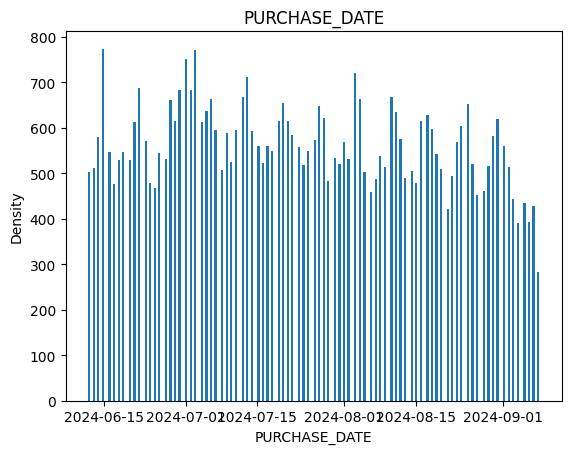

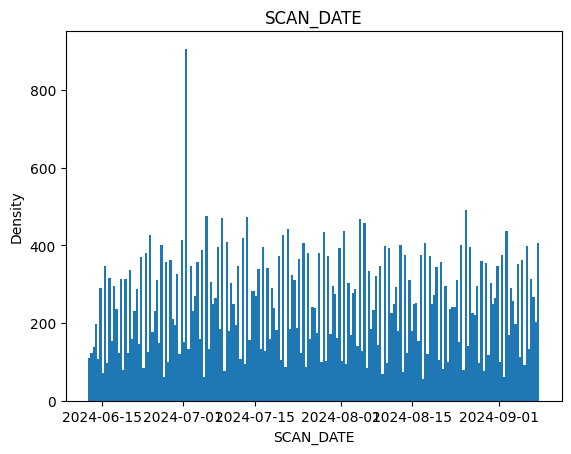

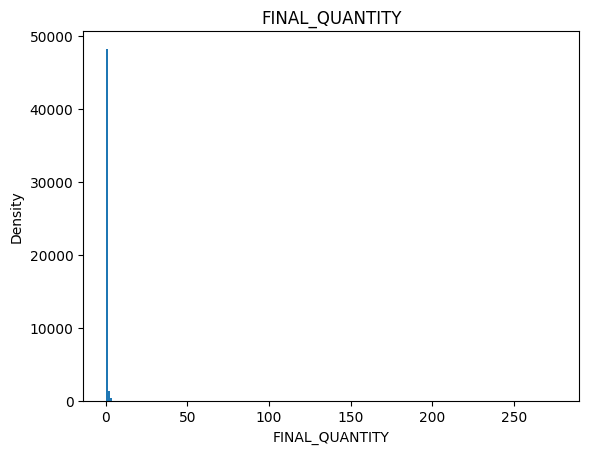

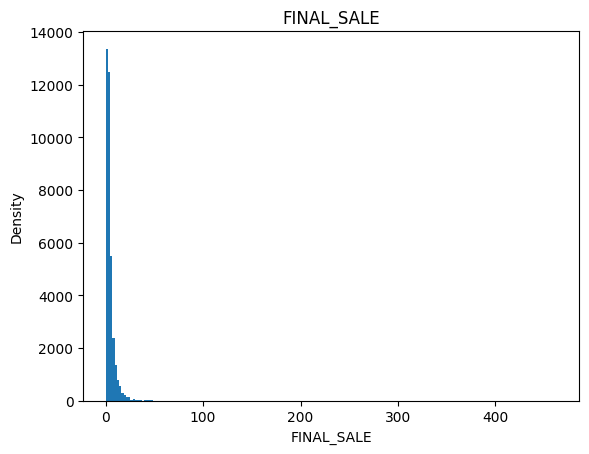

In [25]:
# plot numeric distributions
for col in numeric:
    plt.hist(trans[col],bins=200)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(col)
    plt.show()

The `SCAN_DATE` column has a peak around July 2024. `FINAL_QUANTITY` and `FINAL_SALE` columns show skewed distributions with a few extreme values. I will conduct a deeper investigation into these columns to understand the cause.

### `FINAL_QUANTITY` column

In [26]:
# Check the FINAL_QUANTITY column distribution
print(trans["FINAL_QUANTITY"].describe())
trans["FINAL_QUANTITY"].value_counts(dropna=False)

count    50000.000000
mean         0.814427
std          1.841794
min          0.000000
25%          0.007500
50%          1.000000
75%          1.000000
max        276.000000
Name: FINAL_QUANTITY, dtype: float64


FINAL_QUANTITY
1.00    35698
0.00    12500
2.00     1285
3.00      184
4.00      139
        ...  
6.22        1
1.22        1
1.23        1
2.57        1
2.27        1
Name: count, Length: 87, dtype: int64

In [27]:
# Filter rows where values are not integers
trans[trans["FINAL_QUANTITY"].apply(lambda x: isinstance(x, float) and x % 1 != 0)]["FINAL_QUANTITY"].count()/trans.shape[0]

0.0022

The `FINAL_QUANTITY` field contains non-whole numbers (e.g., 6.22, 1.23, etc.), and this issue affects only 0.2% of the data, it can be considered as noise. Further clarification from the data provider is needed to determine the appropriate course of action.

Additionally, 25% of the `FINAL_QUANTITY` values are 0, which is unusual for a quantity field. Further clarification from the data provider is also needed to determine how to handle these values.

### `FINAL_SALE` column

In [28]:
# Check the FINAL_SALE column distribution
print(trans["FINAL_SALE"].describe())
trans["FINAL_SALE"].value_counts(dropna=False)

count    37500.000000
mean         4.576384
std          6.625663
min          0.000000
25%          1.790000
50%          3.000000
75%          5.190000
max        462.820000
Name: FINAL_SALE, dtype: float64


FINAL_SALE
NaN      12500
1.25      1323
1.00       744
2.99       588
1.99       586
         ...  
16.47        1
10.92        1
61.30        1
13.14        1
42.38        1
Name: count, Length: 1435, dtype: int64

In [29]:
trans["FINAL_SALE"].value_counts(dropna=False).sort_index()

FINAL_SALE
0.00        480
0.01          3
0.03          2
0.04          2
0.05          6
          ...  
224.99        1
238.17        2
267.29        1
462.82        2
NaN       12500
Name: count, Length: 1435, dtype: int64

There are 480 zero values and 12500 NaN in the `FINAL_SALE` column, which is not clear why there are these values in the transaction. Further clarification from the data provider is needed to determine the appropriate course of action.

#### `SCAN_DATE` column

In [30]:
# Check the SCAN_DATE column distribution
print(trans["SCAN_DATE"].describe())
trans["SCAN_DATE"].value_counts(dropna=False)

count                            50000
mean     2024-07-27 00:29:55.204816896
min         2024-06-12 06:36:34.910000
25%      2024-07-05 10:59:32.364750080
50%      2024-07-26 11:43:59.964499968
75%      2024-08-17 17:10:10.855000064
max         2024-09-08 23:07:19.836000
Name: SCAN_DATE, dtype: object


SCAN_DATE
2024-09-08 20:00:42.348    12
2024-09-07 17:30:53.326     8
2024-09-08 19:39:01.589     8
2024-09-08 11:13:01.935     8
2024-09-07 14:52:46.822     8
                           ..
2024-07-24 17:43:01.957     2
2024-06-29 09:22:24.544     2
2024-08-14 12:22:37.353     2
2024-06-17 01:12:11.893     2
2024-09-08 08:21:25.648     2
Name: count, Length: 24440, dtype: int64

In [31]:
# If look at the date only
trans["SCAN_DATE"].dt.date.value_counts()

SCAN_DATE
2024-07-01    1100
2024-07-08     696
2024-07-07     672
2024-08-25     656
2024-07-13     650
              ... 
2024-06-18     460
2024-08-21     448
2024-06-14     414
2024-06-13     340
2024-06-12     226
Name: count, Length: 89, dtype: int64

In [32]:
# Look into the transactions that were scanned at the most common date: 2024-07-01
scan_2024_07_01_check = trans[trans["SCAN_DATE"].dt.date == dt.date(2024, 7, 1)]
scan_2024_07_01_check

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
26,005517fb-6013-40dc-b9cf-9546d3ece5d6,2024-07-01,2024-07-01 16:41:09.715,DOLLAR TREE STORES INC,62df092c1d76344f1a3809e4,34000013142,1.0,NaN
64,00b1c163-f019-4dd7-96f7-80c5c76bed01,2024-06-30,2024-07-01 10:52:14.634,WALMART,64dd3e41b7f2cddac1b065cc,12000171529,1.0,NaN
139,0173fb40-ee90-496a-a448-d4548d14ace1,2024-07-01,2024-07-01 11:26:47.782,FIVE BELOW,636fe210e81cf793db543eac,22000298379,0.0,3.00
221,0239140d-cfbb-4110-855e-9a4598fd6ee4,2024-07-01,2024-07-01 16:08:18.136,BJ'S WHOLESALE CLUB,5ef3dcb77053ab141788238e,41196126150,0.0,10.99
271,02d18d76-ef46-4f69-9d20-9a9b2b2248f1,2024-06-26,2024-07-01 11:28:15.530,WALMART,64f50aeac65c76a8489f0de7,78742294834,0.0,2.32
...,...,...,...,...,...,...,...,...
49914,be6d914a-82aa-4f84-8db5-cf8aeafab950,2024-07-01,2024-07-01 19:49:11.411,WALMART,63016d232f095fa437269dcf,78742100456,1.0,0.78
49948,db8e335d-d9ed-4576-8141-9c9205fa97f3,2024-07-01,2024-07-01 11:09:52.822,WALGREENS,6250987cf59a7c7b10576099,79400507204,1.0,6.79
49953,49072c23-ab9b-492c-ae3f-7763b922b288,2024-07-01,2024-07-01 12:56:33.465,ALDI,649c65cd127ddb5d7f01483e,NaN,1.0,1.79
49955,f42b2d83-7473-45c0-9166-cfe632b46055,2024-06-29,2024-07-01 07:21:10.312,FOOD CITY,619dab3e6f1d182a23c75ea7,21000026326,2.0,8.00


In [33]:
scan_2024_07_01_check.describe(include='all').transpose()

# --> seems normal

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
RECEIPT_ID,1100,543,4c6305f0-8c12-4033-812e-3ed26fd90ac4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PURCHASE_DATE,1100,NaN,NaN,NaN,2024-06-28 19:22:28.363636480,2024-06-12 00:00:00,2024-06-28 00:00:00,2024-06-30 00:00:00,2024-07-01 00:00:00,2024-07-01 00:00:00,NaN
SCAN_DATE,1100,NaN,NaN,NaN,2024-07-01 12:33:10.193172736,2024-07-01 00:01:34.153000,2024-07-01 10:31:41.772999936,2024-07-01 11:19:00.064500224,2024-07-01 14:58:19.436999936,2024-07-01 23:49:27.718000,NaN
STORE_NAME,1100,91,WALMART,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USER_ID,1100,536,5c86a6457a313023b99b5c8d,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BARCODE,938,437,511111503972,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FINAL_QUANTITY,1100.0,NaN,NaN,NaN,0.786255,0.0,0.0,1.0,1.0,5.0,0.546626
FINAL_SALE,833.0,NaN,NaN,NaN,4.273337,0.0,1.87,3.0,4.99,93.67,5.123995


This dataset contains `SCAN_DATE` data from 2024-06-12 to 2024-09-08, with a noticeable peak on 2024-07-01. Further clarification and investigation are needed to understand the cause of this peak. 

Additionally, **we should be cautious about assuming that this 3-month period represents the entire dataset.**

### `PURCHASE_DATE` column

In [34]:
# Check the PURCHASE_DATE column distribution
print(trans["PURCHASE_DATE"].describe())
trans["PURCHASE_DATE"].value_counts(dropna=False)

count                         50000
mean     2024-07-24 09:44:17.664000
min             2024-06-12 00:00:00
25%             2024-07-03 00:00:00
50%             2024-07-24 00:00:00
75%             2024-08-15 00:00:00
max             2024-09-08 00:00:00
Name: PURCHASE_DATE, dtype: object


PURCHASE_DATE
2024-06-15    774
2024-07-03    772
2024-07-01    752
2024-08-03    720
2024-07-13    712
             ... 
2024-09-07    428
2024-08-21    422
2024-09-06    394
2024-09-04    390
2024-09-08    282
Name: count, Length: 89, dtype: int64

In [35]:
# Check when PURCHASE_DATE is after SCAN_DATE, which is not possible
print(trans[trans["PURCHASE_DATE"] > trans["SCAN_DATE"]].shape)
trans[trans["PURCHASE_DATE"] > trans["SCAN_DATE"]].head()

(94, 8)


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
51,008c1dcc-0f96-4b04-98c8-2a2bb63ef89d,2024-07-21,2024-07-20 19:54:23.133,WALMART,5dc24cdb682fcf1229d04bd6,681131157339,0.0,3.18
455,04a320ed-2903-45e5-8fd7-6eaf08daef32,2024-06-29,2024-06-28 11:03:31.783,DOLLAR GENERAL STORE,62855f67708670299a658035,49000024685,0.0,6.00
494,05023b3d-5f83-47a7-a17c-8e8521d0bc94,2024-09-08,2024-09-07 22:22:29.903,SHOP RITE,666a43c77c0469953bfd9ae0,64144041640,2.0,NaN
675,06ce3da3-a588-4c37-93b4-0b6d11e42704,2024-06-22,2024-06-21 12:34:15.665,BIG LOTS,646f6ffb7a342372c858487e,311111706324,0.0,4.05
870,08d0e78f-3e63-40a3-8eb0-73fdf76da52c,2024-06-22,2024-06-21 20:50:01.298,DOLLAR GENERAL STORE,664cafb6e04f743a096a837e,76808280098,2.0,NaN


There are 94 transactions with `PURCHASE_DATE` after the `SCAN_DATE` value, which may indicate data entry errors or system issues. Further clarification from the data provider is needed to determine the appropriate course of action.

## In conclusion, the major data quality issues identified are as follows:

1. Approximately 320 duplicated rows. It is unclear whether these are errors or if the same transaction can appear multiple times in a receipt: Further clarification is needed.

2. Missing values in `BARCODE` (11.5%) and `FINAL_SALE` (25%) columns, which are crucial for data merging and transaction value: Further discussion is needed.

3. About 11,066 entries with the same `RECEIPT_ID` and `BARCODE` but different `FINAL_QUANTITY` or `FINAL_SALE` values. It is unclear whether these discrepancies are due to errors or if they reflect discounts or other reasons: Further clarification is needed.

4. The `STORE_NAME` column shows a dominant 'WALMART' category, potentially introducing bias: Further discussion is needed to address this bias and ensure the validity of future analyses.

5. The dataset only covers 2024-06-12 to 2024-09-08. Caution is needed in assuming this period represents the entire trend.

6. 94 transactions with `PURCHASE_DATE` after `SCAN_DATE`, possibly indicating errors: It is recommended to remove these entries.


## Fields that are challenging to understand:

- 25% of `FINAL_QUANTITY` values are zero, and 0.2% are non-whole numbers (e.g., 6.22, 1.23).

- 480 zero values and 12,500 NaN values in `FINAL_SALE`.

- As noted in the first and third points of the data quality issues, it is difficult to understand why the same transaction appears multiple times within a single receipt, sometimes with different `FINAL_QUANTITY` or `FINAL_SALE` values.